Neuromorphic engineering I

# Lab 2: Subthreshold Behavior of Transistors
**Reminder: Did you `git pull` the exercises before starting this notebook?**

Group number:

Team member 1:

Team member 2:


Date:  

CoACH chip number:


-------------------------------------------------------------------------------------------------------------------

In this lab exercise we will be investigating the subthreshold (weak inversion) behavior of
isolated _p_-- and _n_--channel MOSFETs with $|V_{ds}|>4U_T$, i.e. when the drain is saturated. Specifically, we will

* measure the currents through the transistors as a function of their gate voltage with a big $V_{ds}$
* compare the characteristics of p and n-fet devices w.r.t. the drain current vs gate voltage transconductance ($\kappa$) and compare the off current ($I_0$)


## 1. Prelab

Make sure you have studied the lecture material
before attempting this prelab. The questions will also make much
more sense if you read through the entire lab handout first.  _You are
required to complete this prelab before you can begin taking data._


### n- and p-fets, in an _n_ well Process

A vertical section through the silicon with both n and p-fet transistors is shown in Figure 1.
The class chip has a p-type substrate (like almost all chips nowadays) and both p- and n-wells.  
The p-wells (not shown in the figure) are shorted to the p-substrate because the doping is of the same type.   

Because we are grounding the substrate and we are connecting _n_--well to the power supply, $V_{dd}$ is positive.
This positive voltage reverse biases the junction between the _n_--wells (which are tied to $V_{dd}$) and the substrate (which is tied to gnd).

For this process, $V_{dd}$=1.8 V.


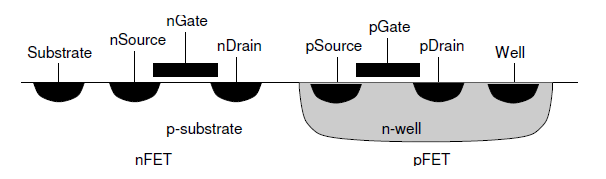

<h4><center> Figure 1: a cross section through p-substrate chip. </center></h4>

For the following questions assume an _n_--well process -- unless stated otherwise.

**1.**<font color=#108ee9> Draw four-terminal symbols for native and well transistors and label all the terminals; use _d_ for drain, _s_ for source, _g_ for gate, _b_ for bulk, and _w_ for well.
Indicate the direction of current flow that is consistent with your choice of drain and source</font> (you can drag the * .png file into the cell below).

**2.** <font color=#108ee9>Write the expressions for the subthreshold (weak inversion) current $I_{ds}$ for both types of
transistors.</font>

**3.** <font color=#108ee9>Write the expressions for the _saturation_ current of these
transistors, that is, the value of the current when $|V_{ds}|\gg\frac{4kT}{q}$.</font>
For the remaining questions you may assume that the transistor is in
saturation.

**4.** <font color=#108ee9>For both transistors, write an expression for source voltage as a function of gate voltage if the channel current is constant and the transistor is in saturation. In each case, what is $\frac{\mathrm{d}V_s}{\mathrm{d}V_g}$?</font>

### ESD protection of CMOS Chips (need to know)

All MOSFET chips are _extremely_ prone to damage by static electricity.
The current through the transistors is controlled by an insulated
gate.  

Not so fun facts: **Even a few tens of volts can blow up the gate. A short walk
across the room can build up kilovolts of static potential.**

There are electrostatic discharge (ESD) protection structures on the chip inputs
that are designed to leak off the static charge before it can damage
the chip, but often this will not be enough.  

There is one simple precautions that can definitely keep the chip safe.

**When the PCB is not powered up always ground yourself to your computer ground (e.g. the outer shell of your USB connector)  before picking up
or touching the board.** This will discharge the static charge. Of course this assumes your computer is plugged into the wall power with a grounded power cable. In general, try to make sure your body charge is discharged before you handle the PCB.


### Experiments and Lab Reports

For the following experiments, include in your lab reports, graphs of all theoretical and experimental curves.  Experimental data should be plotted in a point style so that individual data points are visible.
Make sure you take enough data points and label your axes.
The theoretical fit should be graphed on the same plot in a line style.

Your written interpretation of the results and any anomalies are essential.
Please do not just hand in the plots without any interpretation on your part. 
Your report does not need to be beautiful, but it should show that you understand what you are measuring.

Remember that the purpose of this lab is to investigate _subthreshold_ transistor characteristics. Therefore, all voltage sweeps should span the measurable subthreshold regime while extending just far enough above threshold to show where the threshold is.

Avoid these common mistakes in your report:

- **Not discussing your data sufficiently.** Think about a publication. The readers want to understand your reasoning with you. They want to be able to reproduce your results.
- **Not using cross-hair axes when 0,0 is relevant.** Use grid on to turn on grid, which will draw dotted lines from major ticks. See fontsize to make spacing readable.
- **Forgetting to mention what your plot shows.**
- **Not labeling your figures with a caption,** e.g., “Fig. 1: Transistor drain current vs. gate voltage, Experiment 1.”
- **Insufficiently annotating your data.** It's OK to draw on your plots to indicate the slope of the curve, or the x / y intercepts.
- **Using identical markers for all plots.** Your curves must be distinguishable when printed in black and white. Use e.g. plot(v,i,'o-',v,i2,'s-'), which labels one curve with circle markers and the other with square markers.
- **Forgetting units on measurements,** e.g. “our conductance is 1.000653e-10”. What are the units?
- **Giving your measurements too many digits of precision;** see previous error. Do your instruments really give you 7 digits of precision?


## 2 Set up the experiment
Load all the necessary libraries for this notebook, and define a 'datapath' variable to hold the path to your precious data that you will store and maybe load later

In [42]:
# import the necessary library to communicate with the hardware
import pyplane # to talk to CoACH board
import time # for time.sleep(seconds)
import numpy as np # numpy for arrays etc
from scipy import stats # for stats.linregress
import matplotlib.pyplot as plt # for plotting
import matplotlib
plt.rcParams.update({'font.size': 14}) # make the detault font size larger for your readers
matplotlib.rcParams['pdf.fonttype'] = 42 # save fonts as type that are not outlined in illustrator or other drawing programs
from engineering_notation import EngNumber as ef # format numbers in engineering format quickly, e.g. ef(2e-9)='2n'
from pathlib import Path # used for saving data
import tqdm # great for showing progress in loops
from jupyter_save_load_vars import savevars,loadvars # to save and load your data

datapath = Path('data/lab2') # make a data folder to save your data called data/lab2
datapath.mkdir(parents=True, exist_ok=True)

# below lines are notebook magic for debugging, you can uncomment them when debugging the Coach() class
# %load_ext autoreload
# %autoreload explicit
# %aimport ne1
from ne1 import * # savevars(file) saves your variables, loadvars() loads them back to workspace, other commands setup FETs for measurement etc


## Saving and loading data
Use the blocks below to save and load your data

#### Saving data

In [43]:
# you probably don't want this the first time you work on lab... use it after you collect data
# savevars(datapath/'lab2')

#### Loading previous data

In [44]:
# loadvars(datapath/'lab2',overwrite='yes')
# loadvars(datapath/'lab2') # use to prompt each variable overwrite

### Connect the device

In [45]:
p=Coach() # make the coach object to do measurements
p.open() # you might need to give a port name here, e.g. '/dev/ttyACM1'. Check your device port.

# Note that if you plug out and plug in the USB device in a short time interval, the operating system might allocate a new name like ttyACM1, 
# then you may get error messages with open(...ttyACM0). So please avoid frenquently plugging in/out the board.

[INFO]: 2023-10-11 18:14:57,788 - NE1 - closing device (deleting pyplane.Plane() object (File "/root/GitLab/CoACH-labs/ne1.py", line 202, in close)
[INFO]: 2023-10-11 18:14:57,816 - NE1 - Opened CoACH at /dev/ttyACM0 with firmware version (1, 12, 5) (File "/root/GitLab/CoACH-labs/ne1.py", line 139, in open)


If you get any error, e.g.  `attempting to stat /dev/ttyACM0: No such file or directory`,  then make sure the CoACH board is connected (and maybe mapped through the virtual machine USB).

Troubleshooting: See troubleshooting section at end of [readme.md](https://code.ini.uzh.ch/CoACH/CoACH-labs) and [Coach_Teensy_interface](https://code.ini.uzh.ch/CoACH/CoACH_Teensy_interface)

In [46]:
p.get_firmware_version() # you can use this cell to check if the board is still talking to your computer

(1, 12, 5)

In [47]:
#use this cell to close the board and free resources
p.close()

[INFO]: 2023-10-11 18:14:57,854 - NE1 - closing device (deleting pyplane.Plane() object (File "/root/GitLab/CoACH-labs/ne1.py", line 202, in close)


In [48]:
# use this cell to try different types of resets
# p.reset_soft()
# p.reset_hard()

In [49]:
# use this code block to reproduce timeout bug, 
# import time
# while True:
#     p.read_current(pyplane.AdcChannel.GO0_N)
#     time.sleep(.01)

### Recommendations to this lab

* You do not need to follow the order, it is actually better to do all the measurement of one device together, e.g. 3.1 -> 4.1 -> 3.2 -> 4.2

* **Please save the data as frequently as possible and use the loaded data for processing**

## 3 Current as a Function of Gate Voltage

### 3.1 N-FET saturation current $I_{ds}$ vs $V_{gs}$
For the N-FET device on the CoACH chip, measure current $I_{ds}$ as a function of gate voltage $V_g$ for fixed source, bulk (substrate or well), and drain voltages. This experiment replicates the one you first did in lab1.

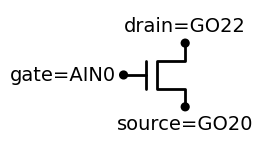

In [50]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

* To select the NFET you will measure, you have to set the input voltage and output current demultiplexer by sending a configuration event :

In [51]:
# configure muxes to measure NFET
p.setup_nfet()

[INFO]: 2023-10-11 18:14:57,982 - NE1 - Opened CoACH at /dev/ttyACM0 with firmware version (1, 12, 5) (File "/root/GitLab/CoACH-labs/ne1.py", line 139, in open)


**Make sure the chip receives the event by a blink of LED1, if it's not the case, the chip is dead and you must replug it.**

Hint: To cancel out the leakage current and shunt resistance (recall lab1), you may want to do a subtraction

$I_{ds} = I_{GO20} - I_{GO20}|_{V_g = 0}$ 

What will be the fixed value for source, bulk (substrate or well), and drain voltages? 
  
* <font color=#108ee9>We give you some values that don't make sense. **Correct the values below and set them to put the NFET in subthreshold current mode in saturation**.</font>

In [52]:
# set source voltage
vs_n = 1
v=p.set_nfet_vs(vs_n)       
print(f"The source voltage is set to {v:.3f} V")

The source voltage is set to 0.999 V


In [53]:
# set drain voltage
vd_n = 0
v=p.set_nfet_vd(vd_n)       
print(f"The drain voltage is set to {v:.3f} V")

The drain voltage is set to 0.000 V


In [54]:
# set trial gate voltage
vg_n = 1.8
v=p.set_nfet_vg(vg_n)       
print(f"The trial gate voltage is set to {v:.3f} V")

The trial gate voltage is set to 1.798 V


In [55]:
# read Ids, from *Source* --> NOTE THAT THE ADC CHANNEL PIN CHANGES THE NAME FOR THE SOURCE
ids_n = p.measure_nfet_id()
print(f"Ids is {ef(ids_n)}A") # Note how ef() function formats engineering format; only a few digits of precision are relevant, right?

Ids is 10.99nA


#### Data acquisition for $I_{ds}$ vs $V_{gs}$ for NFET

* <font color=#108ee9>Sweep the gate voltage over relevant exponential range of current and plot the data you collect on log scale for current, as you did in lab1.</font> 

Here is some code updated from lab1.

Note how we measure both source $I_s$ and drain $I_d$ currents to see which looks better for analysis.

In [ ]:
p=Coach()
p.setup_nfet()
# set source voltage
vs_n = 0
v=p.set_nfet_vs(vs_n)      
print(f"The source voltage is set to {vs_n:.3f}V")
# set drain voltage
vd_n = .4
v=p.set_nfet_vd(vd_n)
print(f"The drain voltage is set to {vd_n:.3f}V")
# set starting gate voltage
vg_n = 0
v=p.set_nfet_vg(vg_n)
print(f"The starting gate voltage is set to {vg_n:.3f}V")

# measure the vg=0 offset current
I0n = p.measure_nfet_id()
print(f'With Vg=0, the offset current I0n={ef(I0n)}A')

# make a V_g array for the gate voltages ranging e.g. from 0.4V to 0.8V.
# you can adjust this range to cover the realistic measurement range.
n_samples=100 # now many points to capture. Note the DAC has only 10 bits of resolution over 3.3V so the smallest step is 3.3mV
vgn_low=.2  # TODO set this line and next line to grab just the range you want
vgn_high=1.2
vgn_set=np.linspace(vgn_low,vgn_high,n_samples) # make linear spacing with 100 points
vgn_actual=np.zeros_like(vgn_set) #we will use this to hold the actual DAC values
#Initialize current variables
idn_meas=np.zeros(n_samples) # drain currents
isn_meas=np.zeros(n_samples) # source currents
import time
#Read Ids at Vg sweep and wait for it to settle
delay=0.01
for n in range(n_samples):
    vgn_actual[n]=p.set_nfet_vg(vgn_set[n]) # record the voltage after DAC quantization
    time.sleep(delay) # sleep a bit for FET to settle
    idn_meas[n]=p.measure_nfet_id()
    isn_meas[n]=p.measure_nfet_is()
    if n%10==0:
        print(f'Vg={vgn_actual[n]:8.3f}V idn_meas={ef(idn_meas[n])}A')
p.close()

#Plot in log scale
plt.semilogy(vgn_actual, idn_meas,'-p')  #plot using line with points marked
plt.semilogy(vgn_actual, isn_meas,'-p')  #plot using line with points marked
plt.legend(['$I_d$','$I_s$'])
plt.xlabel('V_g (V)')
plt.ylabel('Current (A)')
plt.title(f'NFET Source current vs gate voltage with Vds={vd_n-vs_n}V')
plt.grid(True) # turn on grid
import os
os.makedirs('data',exist_ok=True)
plt.savefig(datapath/'lab2-nfet-ids-vs-vgs.pdf') # change the name to what you want
plt.show() # render the plot, you need to show the plot *after* you save it, otherwise you get a new (blank) plot saved

#### Plotting drain current vs gate voltage on log scale

* <font color=#108ee9>Which measurement (drain or source) looks better to analyze? Why do you think this is occurring?</font>

If your data looks good, maybe you want to save it?
You can ignore the error about not being able to pickle p; it is a native code object.

In [57]:
# savevars(datapath/'lab2')

#### Fitting an exponential to the NFET data

Now you can fit a line to the valid region in log plot and try to extract $I_0$ and $\kappa$.

Unfortunately there is no decent interactive line fitting tool for python notebooks. You need do do a lot of ugly slicing and filtering to fit just the range you want. Please check the code below; you need to adapt it for the PFET drain curve fits later.

* <font color=#108ee9>Use the code below to fit an exponential to the best valid range of drain currents.</font>

In [ ]:
idn_corrected=idn_meas # compute the current with no offset subtracted
# idn_corrected=Id_meas-Idn0 # compute the current with offset subtracted

# note that this correction could make estimate of i0n (the off current) meaningless?  
# or could you still estimate it from the intercept of the fit to the currents?

# fit in the valid range (you may want to add the fitted line in the plot)
# hint: use scipy.linregress https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# take only the valid range for fitting by finding the indices of Vg between two limits, then use this range to select only those Id values
# we also need to ignore Id values <0 for log fit
idix=np.where(idn_corrected>0) # find indices of currents >0 so log makes sense
idlog=np.log(idn_corrected[idix]) # compute natural log of current to fit it, use masked array so that negative log values are ignored and not included
vg_masked=vgn_actual[idix]
vg0=.5  # set limits for fit
vg1=.6
idx=np.where((vg_masked>vg0) & (vg_masked<vg1)) # find indices that are in the gate voltage range here
x=vg_masked[idx] # get the vg values
y=idlog[idx] # and id values
fit=stats.linregress(x,y) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
idn_fit=np.exp(fit.intercept+x*fit.slope)
i0n=np.exp(fit.intercept) # compute current at Vg=0
# fit.slope is efolds/volt
U_T=25e-3 # thermal voltage in Volts
q=1.6e-19 # elementary change in Coulombs
v_per_efold=1/fit.slope # compute the volts for one "e-fold" (factor of increase of e)
# compute kappa from UT and v_per_efold
kappa=U_T/v_per_efold

#Plot in log scale
plt.semilogy(vgn_actual, idn_corrected,'p',label='measured currents')  #plot as points
plt.semilogy(x, idn_fit,'-',label='fit')  # plot as line
plt.xlabel('$V_{gs}$ (V)')
plt.ylabel('$I_d$ (A)')
plt.title('Fig. 3.1 NFET Drain current vs gate voltage with fit')
plt.grid(True) # turn on grid
import os
os.makedirs('data',exist_ok=True)
plt.savefig(datapath/'lab2-nfet-ids-vs-vgs-fitted.pdf') # change the name to what you want
plt.show() # render the plot, you need to show the plot *after* you save it, otherwise you get a new (blank) plot saved
print(f'Exponential fit between {vg0}V and {vg1}V has i0n={ef(i0n)}A ({ef(i0n/q)}e/s) and inverse slope {ef(v_per_efold)}V/e-fold; kappa={kappa:.3f} assuming U_T={ef(U_T)}V') # note use of ef() to show i0n and v_per_efold in engineering notation


kappa_n=kappa # save data for later
v_per_efold_n=v_per_efold

#### <font color=#108ee9>Please comment on your results.</font>
1. Over what current range does your exponential fit make sense, considering the limitations of the current sensing?
2. Does the value of the off current $I_0$ make sense?
4. How many mV must $V_g$ change to change the current by a factor of $e$?
3. Does the value of $\kappa$ make sense?

<font color=#108ee9>Enter your discussion here.</font>


### 3.2 P-FET saturation current $I_{ds}$ vs $V_{gs}$
Now you should replicate above experiment but using the test PFET

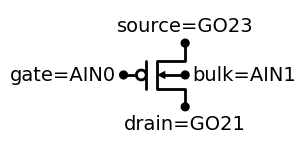

In [59]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may want to do a subtraction:

$I_{ds} = I_{GO21} - I_{GO21}|_{V_g = 0}$

To select the PFET, you must set the input voltage demultiplexer and output current mux by using the Coach() function `setup_pfet()`:

* <font color=#108ee9>What will be the fixed source, bulk (substrate or well), and drain voltages for the PFET? **Correct the values below to make sense.** </font>

In [ ]:
# configure muxes to measure PFET
p.open()
p.setup_pfet()

# set bulk voltage; HINT it must be the positive supply voltage 1.8V
vdd=1.8 # power supply voltage in V
vb_p = 0
p.set_pfet_vb(vb_p)
print(f"The bulk voltage is set to {vb_p}V")
# set source voltage; HINT it must be the same as the nwell bulk voltage
vs_p = 0
p.set_pfet_vs(vs_p)
print(f"The source voltage is set to {vs_p}V")
# set drain voltage; HINT it should be a lower voltage, can be ground (0) or anything that saturates the drain current
vd_p = 0
p.set_pfet_vd(vd_p)
print(f"The drain voltage is set to {vd_p}V")
# set trial gate voltage
vg_p = 0
p.set_pfet_vg(vg_p)
print(f"The gate voltage is set to {vg_p}V")
# read Ids 
ids_p = p.measure_pfet_is() # note here we measure the PFET current at its source
print(f"Ids is {ef(ids_p)}A") # note again how we use f-string and format the current in engineering format using engineering_notation method that we imported as ef()

With vg_p set to $V_{dd}=1.8V$ you should get a small current of a few nA. With vg_p set to ground (0 volts), you should get a saturating current of >1uA.

You can use this little code block to make sure the PFET is making sense, and to find a reasonable range over which to sweep vg_p.

* <font color=#108ee9>Data acquisition and plotting for PFET; repeat the NFET measurements here but for PFET.</font>

You can copy and adapt the code from above

In [ ]:
p.setup_pfet()
# set source voltage
vdd=1.8 # power supply voltage in V
vb_p = vdd
vs_p = vdd
vd_p = 0 # NOTE that it needn't be at ground, just enough to saturate the current
p.set_pfet_vb(vb_p)
p.set_pfet_vs(vs_p)
p.set_pfet_vd(vd_p)

# measure the vg=0 offset current
I0p = p.measure_pfet_is() # note here we measure the PFET current at its source
print(f'With Vgs=0, the offset current Id0={ef(I0p)}A')

# make a V_g array for the gate voltages ranging e.g. from 0.4V to 0.8V.
# you can adjust this range to cover the realistic measurement range.
n_samples=100
vg_high=1.5 # starting gate voltage
vg_low=1 # ending gate voltage
vgp_set=np.linspace(vg_high,vg_low,n_samples) # make linear spacing with n_samples points
vgp_actual=np.zeros_like(vgp_set) # we will use this to hold the actual DAC values
#Initialize current variables
isp_meas=np.zeros(n_samples) # source current
idp_meas=np.zeros(n_samples) # drain current 
import time
#Read Ids at Vg sweep and wait for it to settle
delay=0.01
for n in range(n_samples):
    vgp_actual[n]=p.set_pfet_vg(vgp_set[n])
    time.sleep(delay) # delay to allow device to settle
    isp_meas[n]=p.measure_pfet_is()
    idp_meas[n]=p.measure_pfet_id()
    if n%20==0:
        print(f'Vg={vgp_actual[n]:8.3f}V Is_meas={ef(isp_meas[n])}A')


In [ ]:
# if something goes wrong use this cell before unplugging board
p.close()

* <font color=#108ee9>Now plot the PFET data.</font> Note we use $V_{sg}-V_s-V_g$ for x-axis because the source is at a higher voltage. 

In [ ]:
#Plot data in log scale
vsgp=vdd-vgp_actual # compute the gate voltage from Vdd for plotting more sensibly
plt.semilogy(vsgp, idp_meas,'-p') 
plt.semilogy(vsgp, isp_meas,'-p')  
plt.legend(['$I_d$','$I_s$'])

plt.xlabel('$V_{sg}$ (V)')
plt.ylabel('$I_{s}$ (A)')
plt.title(f'Fig. 3.2 PFET Source current vs gate voltage with Vsd={vs_p-vd_p}V')
plt.grid(True) # turn on grid
plt.show()

# Id_corrected=Id_meas-Id0 # compute the current with offset subtracted
# note that this correction could make estimate of I_0 (the off current) meaningless?  
# or could you still estimate it from the intercept of the fit to the currents?


In [ ]:
# if the data looks good it might be good to save it too
savevars(datapath/'lab2')

#### Fitting an exponential to the PFET data

* <font color=#108ee9>Fit a line to the valid region in log plot and try to extract $I_0$ and $\kappa$.</font>

We have adapted the NFET code for you; you can just adjust it for your data.

* <font color=#108ee9>Can you improve the fit and curve by subtracting $I_{\rm leak}$, the instrumentation leakage current?</font>

In [ ]:
isp_corrected=isp_meas # compute the current with no offset subtracted, 

# note that this correction could make estimate of i0n (the off current) meaningless?  
# or could you still estimate it from the intercept of the fit to the currents?

# fit in the valid range (you may want to add the fitted line in the plot)
# hint: use scipy.linregress https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# take only the valid range for fitting by finding the indices of Vg between two limits, then use this range to select only those Id values
# we also need to ignore Id values <0 for log fit
idix=np.where(isp_corrected>0) # find indices of currents >0 so log makes sense
idlog=np.log(isp_corrected[idix]) # compute natural log of current to fit it, use masked array so that negative log values are ignored and not included
vsgp_masked=vsgp[idix]
vg0=.6  # set limits for fit
vg1=.7
idx=np.where((vsgp_masked>vg0) & (vsgp_masked<vg1)) # find indices that are in the gate voltage range here
x=vsgp_masked[idx] # get the vg values
y=idlog[idx] # and id values
fit=stats.linregress(x,y) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
idp_fit=np.exp(fit.intercept+x*fit.slope) # compute the fitted values on the gate voltage points
i0p=np.exp(fit.intercept) # compute current at Vg=0
# fit.slope is efolds/volt
U_T=25e-3 # thermal voltage in Volts
q=1.6e-19 # elementary change in Coulombs
v_per_efold=1/fit.slope # compute the volts for one "e-fold" (factor of increase of e)
# compute kappa from UT and v_per_efold
kappa=U_T/v_per_efold

#Plot in log scale
plt.semilogy(vsgp, isp_corrected,'p',label='measured currents')  #plot as points
plt.semilogy(x, idp_fit,'-',label='fit')  # plot as line
plt.xlabel('$V_{gs}$ (V)')
plt.ylabel('$I_d$ (A)')
plt.title('PFET Drain current vs gate voltage with fit')
plt.grid(True) # turn on grid
import os
os.makedirs('data',exist_ok=True)
plt.savefig(datapath/'lab2-pfet-ids-vs-vgs-fitted.pdf') # change the name to what you want
plt.show() # render the plot, you need to show the plot *after* you save it, otherwise you get a new (blank) plot saved
print(f'Exponential fit between {vg0}V and {vg1}V has i0p={ef(i0p)}A ({ef(i0p/q)}e/s) and inverse slope {ef(v_per_efold_p)}V/e-fold; kappa={kappa:.3f} assuming U_T={ef(U_T)}V') # note use of ef() to show i0n and v_per_efold in engineering notation

kappa_p=kappa # save data for later
v_per_efold_p=v_per_efold

## Final summary plot of subthreshold transconductance behavior

* <font color=#108ee9>Plot NFET and PFET offset-corrected data together in one plot.</font>

Use `plt.legend` with f=strings to annotate the sumamry $I_0$ mV/e-fold and $\kappa$ values for each FET type.

In [ ]:
pre=0 # digits precision for labels
nfet_label=f'NFET: $I_0={ef(i0n,precision=pre)}A $\kappa$={ef(kappa_n,precision=pre)}, {ef(v_per_efold_n,precision=pre)}V'
pfet_label=f'PFET: $I_0={ef(i0p,precision=pre)}A $\kappa$={ef(kappa_p,precision=pre)}, {ef(v_per_efold_p,precision=pre)}V'
plt.legend(['NFET data',nfet_label,'PFET data',pfet_label])

# TODO complete the plot using your n and pfet data


* <font color=#108ee9>Include here a summary of your final data and what the results mean.</font>

## Clean up

In [ ]:
# maybe you want to save your data?
# savevars(datapath/'lab2') # save your data so you can load it later for better analysis

## Postlab

_The answers to the postlab should be included below._

Today, most processes are double-well or _twin-tub_ both n- and p-wells are implanted in a lightly doped epitaxially-grown p-substrate.  
_Epitaxially_ means that the layer is grown atom by atom by chemical vapor deposition, resulting in a very regular and pure crystal structure.

The classchips you are using were fabricated in a 180nm process.
For an _n_-well device, the _n_-type material of the well is the bulk, while the active areas (source and drain) are _p_-type. 
The gate voltage must force all the electrons in the _n_-well away from the surface.
The resulting depletion region provides a channel for holes through enemy territory (n-well) separating the
p-type source and drain.
If the bulk is heavily doped, the gate must work harder to repel electrons.

Another way of saying this is that the capacitance of this depletion layer and the gate oxide capacitance form a _capacitive divider_ that determines how much of the gate voltage appears at the surface channel.
If the depletion layer is thin, the depletion capacitance will be large and hence the divider ratio will be unfavorable.

**(1)** <font color=#108ee9>How does the thickness of the depletion region depend on the doping density and
on the channel (surface) potential? Assume that the doping density is uniform.</font>


**(2)** <font color=#108ee9>Explain why $\kappa$ varies with the source voltage at constant current (as in the source follower).</font>

**(3)** <font color=#108ee9>Is there a difference in your measured $\kappa$ between the n- and p-type devices? Explain the possible reason(s).
</font>

**(4)** <font color=#108ee9>From your results in the experiments, plot data to test 
the assumption that $\kappa$ is constant is reasonable.</font> 

_Hint:_ You can plot the derivative of $\log(I_{ds})$ vs $V_{gs}$; how is this slope related to the instantaneous $\kappa$ value? You will get terrible results unless you smooth the data using e.g. a spline method. Here is a little code snippet to start you on the right direction:

In [ ]:
# computing slope from raw data is extremely noisy. We use spline here to fit data and then np.gradient
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev
from scipy.interpolate import splrep, splev 

ut=25e-3 # thermal voltage
log_in_smooth=np.log(idn_corrected) # compute log current
n_spline=splrep(vgn_actual,log_in_smooth,k=5,s=3) # compute the spline parameters n_spline
k_n=ut*np.gradient(splev(vgn_actual,n_spline),vgn_actual) # evaluate the spline and compute its derivative

* <font color=#108ee9>Comment on your results. Do they show the expected behavior of $\kappa$ with $V_g$?</font>

Bravo! If you managed to complete this entire exercise you did very well. 

## Upload your report (this notebook)
<font color=#108ee9>Upload your report to the course dropbox as either HTML or PDF (not ipynb, which is hard for us to assess).</font>

## What we expect you to learn
Please see the [NE1 exam preparation guide](https://drive.google.com/file/d/1nOq3UbcEv_ik425VBYqcH9hAET7FyIeP/view?usp=drive_link)
